# Why Attention Mechanism?

- Explaination of attention mechanism independently from other modules.
- Implementation of 4 different variants of the mechanisms.
- We will build a multi-head attention upon these variants.


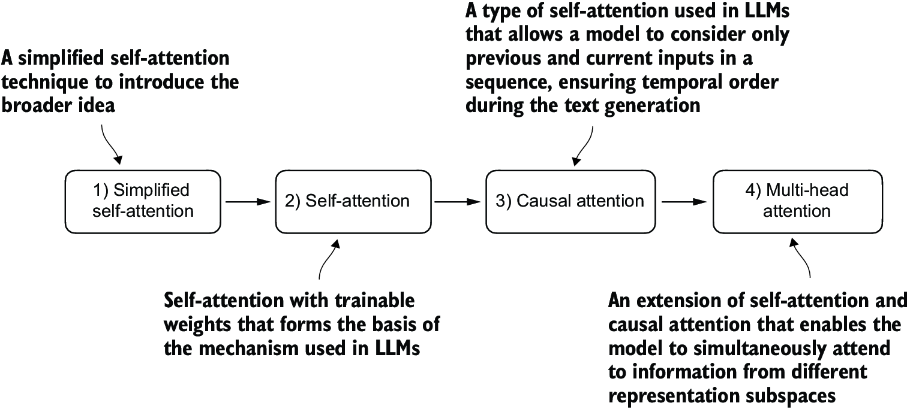

- In the causal attention mechanism, a mask is added to guide the LLM to generate one word at a time.


### Modeling long sequences is challenging

- Illustraion with an encoder decoder submodules.
- The encoder is responsible for reading the entire text firstly, then the decoder generates the translated text.
- RNN was one of the first well-known encoder-decoder NN architecture.
- RNN moves sequentially (updating its hiden states word by word).
- A hidden state is a memory cell that keeps track of weights computations.
- A decoder in RNN has no access to early hidden states, so it might loose context specially for complex sentences and long dependencies.

### Attention mechanisms helps in capturing data dependencies

- The information learned by an RNN is abbreviated in one last hidden state.
- RNNs work well for short context but not for long context because they don't have direct access to previous input.
- An improved technique, called Bahdanau attention mechanism, for RNNs enabled selective accessing to different parts of the input in every decoding step.
- In Bahdanau, The important of an input token to the current output token is determined by the attention weights.

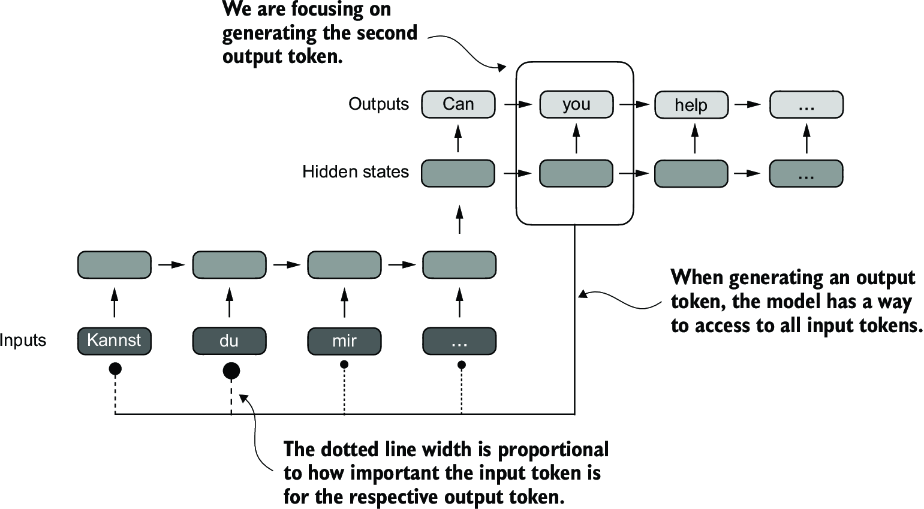

- The self-attention mechanism, which was the biggest breakthrough after, was originally inspired from the Bahandau attention mechanism.
- When computing a representation of a sequence using self-attention, it allows each position in a sequence to relate (attend to) all other positions in the same sequence.
- Self-attention is a core component of current LLMs that is built with transformers.
- This is the explaination of the self-attention mechanism used in GPT models.


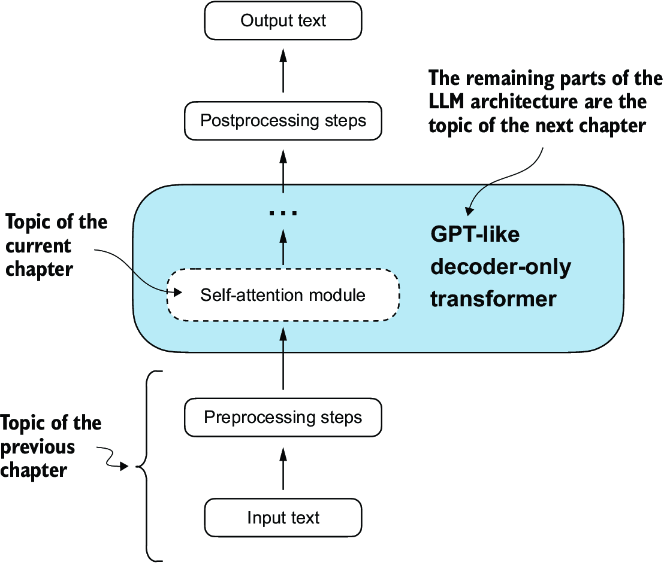

# Using self-attention to attend to different positions

- For all transformer based LLMs, self-attention is considered the core architectural component.
- Name intuition behind "self" in "self-attention": the mechanism focuses in attending different parts of input sequence to other parts in the same input itself not other independent sequence.
- Gradual explaination of the mechanism is intented here.

### 1. A self-attention mechanism without trainable weights

- No trainable weights for simple illustration purposes
- The self-attention purpose is to form a context vector $z$ for each token.
- This context vector is based on information comes from all surrounding input tokens.

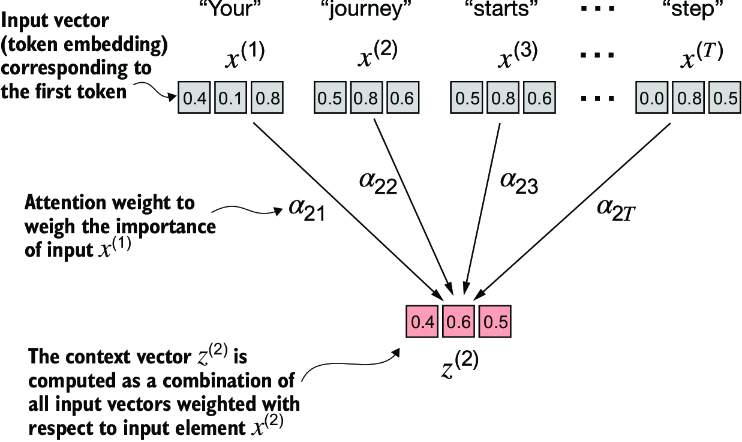

- The previous figure presents the creation of one context vector for an input sequence $x$ of length $T$.
- $a_{21}$ to $a_{2T}$ are the attention weights needed to compute the context vector of the token "journey" $z^{(2)}$.
- We can think of context vector as an enriched embedding vector (enriched by the current input sequence/context).
- Now, $z^{(2)}$ contains information about $x^{(2)}$ and all other $x^i$.

In [1]:
import torch

In [9]:
# Implementation of the simplified self-attention mechanism
# Produce a context vector

inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # x1
     [0.55, 0.87, 0.66], # x2
     [0.57, 0.85, 0.64], # x3
     [0.22, 0.58, 0.33], # x4
     [0.77, 0.25, 0.10], # x5
     [0.05, 0.80, 0.55]] # x6
)

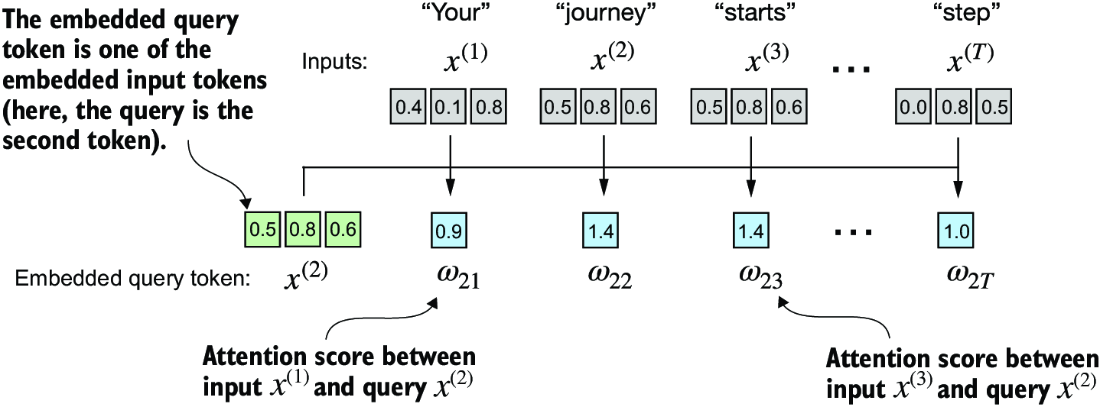

- First step: use dot product to compute the attention scores $w$ between the query $x^2$ and all surronding tokens.

In [19]:
query = inputs[1] # x2: "journey"
attn_scores_w2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    attn_scores_w2[i] = torch.dot(x_i, query)

print(attn_scores_w2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


- Important Note: the dot product is a method to measure similarity between two vectors.
- To maintain training stability in our LLM, we often conduct a normalization step.
- Here, we add a normalization step over the computed attention scores.
- This way, all the scores will sum up to 1.

In [20]:
attn_weights_a2 = attn_scores_w2 / attn_scores_w2.sum()

print(f"Attention weights: {attn_weights_a2}\nSum of attention weights = {attn_weights_w2.sum():.5f}")

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of attention weights = 1.00000


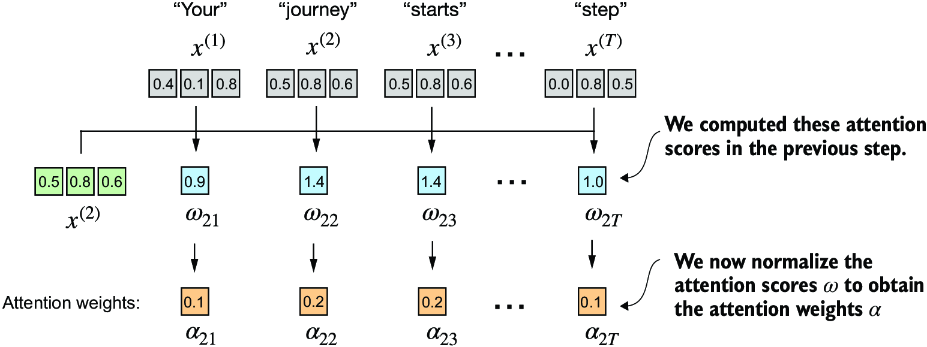

If you find something wrong, please contact me at: muhammadhelmymmo@gmail.com .
Thanks